<a href="https://colab.research.google.com/github/subhaz18/colab/blob/main/nlpresumeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora
!pip install pyLDAvis
#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
!pip install jsonlines
#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import csv
df = pd.read_csv("/content/Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[0:200,]
data.head()


ParserError: Error tokenizing data. C error: EOF inside string starting at row 1764

In [ ]:
!python -m spacy info

In [ ]:
!python -m spacy --help en_core_web_lg

                                                                                                    
 Usage: python -m spacy [OPTIONS] COMMAND [ARGS]...                                                 
                                                                                                    
 spaCy Command-line Interface                                                                       
 DOCS: https://spacy.io/api/cli                                                                     
                                                                                                    
╭─ Options ────────────────────────────────────────────────────────────────────────────────────────╮
│ --install-completion        [bash|zsh|fish|powershell|pwsh]  Install completion for the          │
│                                                              specified shell.                    │
│                                                              [default: None]             

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 965.1 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:


nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "/content/jz_skill_patterns.jsonl"

In [ ]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [ ]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [ ]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

In [ ]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()


,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
1647,23190306,"2ND LEVEL ASSISTANT STORE MANAGER, OP...","<div class=""fontsize fontface vmargins hmargin...",APPAREL,2nd level assistant store manager operation ma...,"[documentation, design, business, material]"
1021,36074301,SALES Summary Bilingua...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sale summary bilingual account executive 15yrs...,"[commerce, wireless, marketing, support, busin..."
2338,11360471,MATERIAL AND TOOLING CONTROL LEAD ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,material tooling control lead summary qualifie...,"[security, material, specification, diagram, s..."
2436,17686472,BAKERY ENTREPRENEUR Summary ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,bakery entrepreneur summary comprehensive expe...,"[documentation, security, engineering, specifi..."
2249,96493528,V/P COMMERCIAL RELATIONSHIP MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",BANKING,v p commercial relationship manager summary ac...,"[documentation, passenger, security, terminal,..."


In [ ]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")

In [ ]:
Job_Category=input()

FITNESS


In [ ]:
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

Text(0.5, 1.0, 'Most Used Words in FITNESS Resume')

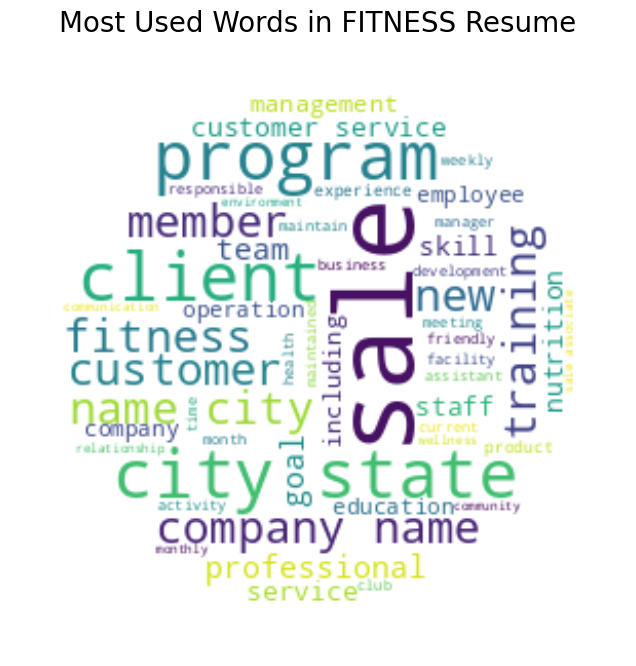

In [ ]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [ ]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

In [ ]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [ ]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [ ]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [ ]:
!pip install docx2txt
import docx2txt


def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', '     ')
    return None


if __name__ == '__main__':
    input_resume=extract_text_from_docx('/content/subhashResume.docx')

In [ ]:
edu = r'\b([A-Z][^\s,.]+[.]?\s[(]?)([A-Z][^\s,.]+[.]?\s[(]?)*(College|University|Institute|School|School of|Academy)[^,\d]*(?=,|\d)\b'
ee = re.findall(edu, input_resume)
#print(ee)
ed=list()
for i in ee:
  k=""
  for j in i:
    k+=j
  ed.append(k)
print("Education:",ed)


Education: ['Rajalakshmi Engineering College', 'KRM Public School']


In [ ]:
cg= r'\bCGPA-*[0-9].*[0-9]*[0-9]\b'
dd = re.findall(cg, input_resume)
print(dd)

['CGPA-8.2']


In [ ]:
import re

def extract_name(text):
    # Regular expression pattern for matching names
    name_pattern = re.compile(r'\b[A-Z][a-z]*\s[A-Z][a-z]*\b')

    # Find all potential names in the text
    potential_names = name_pattern.findall(text)

    # Return the first potential name found
    if potential_names:
        return potential_names[0]
    else:
        return None

# Example resume text
resume_text = input_resume

# Extracting name from resume
name = extract_name(resume_text)
print("Applicant's Name:", name)


Applicant's Name: Subhash P


In [ ]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [ ]:
import nltk
nltk.download('punkt')
SKILLS_DB =["python", "java", "machine learning", "data analysis", "natural language processing", "computer vision","sql",'C',"C++","Excel"]
stop_words = set(nltk.corpus.stopwords.words('english'))
word_tokens = nltk.tokenize.word_tokenize(input_resume)

    # remove the stop words
filtered_tokens = [w for w in word_tokens if w not in stop_words]

    # remove the punctuation
filtered_tokens = [w for w in word_tokens if w.isalpha()]

    # generate bigrams and trigrams (such as artificial intelligence)
bigrams_trigrams = list(map(' '.join, nltk.everygrams(filtered_tokens, 2, 3)))

    # we create a set to keep the results in.
found_skills = set()

    # we search for each token in our skills database
for token in filtered_tokens:
  if token.lower() in SKILLS_DB:
    found_skills.add(token)

    # we search for each bigram and trigram in our skills database
for ngram in bigrams_trigrams:
  if ngram.lower() in SKILLS_DB:
    found_skills.add(ngram)
print(list(found_skills))

['Python', 'Machine Learning', 'SQL']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
emails = re.findall(email_regex, input_resume)
print("Email:",emails)

Email: ['psubhash2004@gmail.com']


In [ ]:
phone_regex = r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]'
phone_numbers = re.findall(phone_regex, input_resume)
ph=''
#print(type(phone_numbers))
for i in range(len(phone_numbers)):
  for j in phone_numbers[i]:
    if str(j).isdigit():
      ph+=str(j)

#print(phone_numbers)
print("Contact:",ph[2:])
phone=ph[2:]

Contact: 9841633259


In [ ]:
input_skills=input()

python,sql,data sciene


In [ ]:
req_skills = input_skills.lower().split(",")
print(req_skills)
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

['python', 'sql', 'data sciene']


NameError: name 'unique_skills' is not defined

In [ ]:
print(resume_skills)

['github', 'commerce', 'python', 'machine learning', 'algorithms', 'javascript', 'ml', 'reinforcement learning', 'ai', 'languages', 'git']


In [ ]:
skillss=resume_skills+list(found_skills)
out = map(lambda x:x.lower(),skillss)
print("Skills:",set(out))

NameError: name 'resume_skills' is not defined

In [ ]:
docs = data["Clean_Resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 4
ldamodel = lda(
    bow,
    num_topics=num_topics,
    id2word=dictionary,
    passes=50,
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.008*"patient" + 0.008*"de" + 0.006*"n" + 0.005*"information" + 0.004*"management" + 0.004*"care" + 0.004*"la" + 0.003*"system" + 0.003*"que" + 0.003*"state"'),
 (1,
  '0.011*"management" + 0.010*"company" + 0.009*"state" + 0.008*"city" + 0.008*"sale" + 0.007*"customer" + 0.007*"name" + 0.007*"business" + 0.007*"project" + 0.006*"system"'),
 (2,
  '0.014*"marketing" + 0.010*"medium" + 0.008*"company" + 0.008*"city" + 0.008*"state" + 0.007*"design" + 0.006*"name" + 0.006*"project" + 0.005*"communication" + 0.005*"client"'),
 (3,
  '0.012*"state" + 0.011*"city" + 0.010*"student" + 0.009*"company" + 0.008*"name" + 0.007*"skill" + 0.006*"program" + 0.005*"service" + 0.005*"education" + 0.005*"school"')]

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, bow, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.031025  0.074526       1        1  59.496792
3      0.032510  0.077184       2        1  21.729431
2      0.101558 -0.112011       3        1  13.320512
0     -0.165093 -0.039700       4        1   5.453265, topic_info=              Term         Freq        Total Category  logprob  loglift
404      marketing   333.000000   333.000000  Default  30.0000  30.0000
1731       student   342.000000   342.000000  Default  29.0000  29.0000
405         medium   187.000000   187.000000  Default  28.0000  28.0000
1692       patient   160.000000   160.000000  Default  27.0000  27.0000
236          state  1204.000000  1204.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
187      procedure    15.253771   201.111924   Topic4  -6.1227   0.3299
48         company    16.661559  1163.392859   Topic4  -6.0344  -1.3370
38            city    15.260204  1095.718941   Topic4  -6.1222  -1.3650
189   professional    14.419918   328.762126   Topic4  -6.1789  -0.2178
460        support    14.322231   308.546805   Topic4  -6.1857  -0.1611

[317 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1061      1  0.534455    03
1061      2  0.170054    03
1061      3  0.097174    03
1061      4  0.194347    03
1         1  0.654045    10
...     ...       ...   ...
680       1  0.611516  work
680       2  0.237412  work
680       3  0.107915  work
680       4  0.043166  work
7829      3  0.922627    wy

[579 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [ ]:
import re
edu = r'\b([A-Z][^\s,.]+[.]?\s[(]?)([A-Z][^\s,.]+[.]?\s[(]?)*(College|University|Institute|School|School of|Academy)[^,\d]*(?=,|\d)\b'
ee = re.findall(edu, input_resume)
#print(ee)
e=list()
for i in ee:
  k=""
  for j in i:
    k+=j
  e.append(k)
cg= r'\bCGPA-*[0-9].*[0-9]*[0-9]\b'
d = re.findall(cg, input_resume)

def extract_name(text):
    # Regular expression pattern for matching names
    name_pattern = re.compile(r'\b[A-Z][a-z]*\s[A-Z][a-z]*\b')

    # Find all potential names in the text
    potential_names = name_pattern.findall(text)

    # Return the first potential name found
    if potential_names:
        return potential_names[0]
    else:
        return None

# Example resume text
resume_text = input_resume

# Extracting name from resume
name = extract_name(resume_text)




email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
emails = re.findall(email_regex, input_resume)






phone_regex = r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]'
phone_numbers = re.findall(phone_regex, input_resume)
ph=''
#print(type(phone_numbers))
for i in range(len(phone_numbers)):
  for j in phone_numbers[i]:
    if str(j).isdigit():
      ph+=str(j)

#print(phone_numbers)
print(ph[2:])
phone=ph[2:]













print("EDUCATION:",e)
print("CGPA:",d)
print("Applicant's Name:", name)
print("Email:",emails)
print("Contact:",phone)
print("Skills:",set(out))

NameError: name 'input_resume' is not defined